In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-78.26464265438095 95.53298258863981
-10.570317009915456 130.50823219381846
0.8985923451225943 -64.76184508520942
-8.596821217291293 -138.535829966751
26.24926483314414 54.86015383994416
65.12857225293888 69.84819957242794
29.19833839683257 170.7036094714901
45.27884601365952 -31.278933942962368
6.099701854333617 66.6798734155268
19.816751535631283 -0.2738505700321241
-47.04197705188278 -9.06670586542603
-77.62637146518107 -145.20891510232815
26.594120194831333 39.83570745418953
43.66125121918563 133.70132250226163
49.144503640685514 170.14448927638944
-57.042297260666494 94.00515347678987
56.47194190790711 127.32482144142978
-29.43811553758637 -86.08768775797076
13.297480066994211 142.95341267114594
31.56060000849523 80.90320184301078
-77.68002234743976 37.16178485309811
-12.423179029316344 -176.0859551061475
67.84202645508469 -71.52956063815799
44.8971219516998 52.934256666691226
58.632133863437105 -105.24999227406917
69.40755006260986 -135.5534263875898
-33.16013890516814 -108.04754

53.36212224411679 8.348981398018822
-55.974124010697004 5.040853561634151
19.524933142717202 158.6591411524861
35.469895603504085 23.768115397476976
76.56612778310233 161.16592838932036
-28.088275184928982 -175.98846768639103
-4.116800642983975 97.2218017117292
-27.66955869849312 -4.616883399183678
72.29640242488531 127.82665562799298
51.85544949295331 -27.60643550889489
-82.33520826701752 144.88865437684325
-27.914958240617253 -65.12128653758275
21.738655043985702 -168.02655847359296
61.18964398360424 -12.136011482553187
29.010957695707134 88.9413243634234
15.649858282336282 128.09152513470235
16.36443518032023 -138.82010380233865
22.819561518285596 55.5251196516229
84.85567928651795 -174.92830667831578
-8.244443249383835 -35.724308834266935
83.89931796527256 77.57323844326555
-35.346632130773926 -132.5233884001575
-7.861569209044944 -4.000456931060967
23.05105417060483 40.74007123329031
-52.74929600626055 -176.43514482754023
45.59087916449684 -86.0938373986148
87.46007422354398 32.80

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | nguiu
City not found. Skipping...
Processing Record 3 of Set 1 | santa isabel do rio negro
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | bandar-e lengeh
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | ugoofaaru
Processing Record 10 of Set 1 | tessalit
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | umm lajj
Processing Record 14 of Set 1 | chuguyevka
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | chulman
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | joshimath
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | vai

Processing Record 38 of Set 4 | timra
Processing Record 39 of Set 4 | colorado
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | wesley
Processing Record 42 of Set 4 | oyama
Processing Record 43 of Set 4 | diamantino
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | mabaruma
Processing Record 46 of Set 4 | verkhoyansk
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | mantua
Processing Record 49 of Set 4 | serebryansk
Processing Record 50 of Set 4 | jiddah
City not found. Skipping...
Processing Record 1 of Set 5 | bambanglipuro
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | zolotinka
City not found. Skipping...
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | alexandria
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | buchanan
Processing Re

Processing Record 24 of Set 8 | yugorsk
Processing Record 25 of Set 8 | sturgeon falls
Processing Record 26 of Set 8 | panguna
Processing Record 27 of Set 8 | fare
Processing Record 28 of Set 8 | coruripe
Processing Record 29 of Set 8 | kaseda
Processing Record 30 of Set 8 | nicoya
Processing Record 31 of Set 8 | mao
Processing Record 32 of Set 8 | salym
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | linxia
Processing Record 35 of Set 8 | jamshedpur
Processing Record 36 of Set 8 | miraflores
Processing Record 37 of Set 8 | sijunjung
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | yima
Processing Record 40 of Set 8 | shirokiy
Processing Record 41 of Set 8 | sivas
Processing Record 42 of Set 8 | dubbo
Processing Record 43 of Set 8 | temaraia
City not found. Skipping...
Processing Record 44 of Set 8 | ivanava
Processing Record 45 of Set 8 | kismayo
Processing Record 46 of Set 8 | itoman
Processing Record 47 of Set 8 | xichang
Processing

Processing Record 14 of Set 12 | cascais
Processing Record 15 of Set 12 | paro
Processing Record 16 of Set 12 | toktogul
Processing Record 17 of Set 12 | zhigansk
Processing Record 18 of Set 12 | omboue
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | vung tau
Processing Record 21 of Set 12 | yuci
Processing Record 22 of Set 12 | asekeyevo
Processing Record 23 of Set 12 | capreol
Processing Record 24 of Set 12 | kutum
Processing Record 25 of Set 12 | tortoli
Processing Record 26 of Set 12 | sorland
Processing Record 27 of Set 12 | upata
Processing Record 28 of Set 12 | yuzhno-kurilsk
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | kiama
Processing Record 31 of Set 12 | atasu
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | rosa zarate
Processing Record 34 of Set 12 | krasnogorskiy
Processing Record 35 of Set 12 | port hardy
Processing Record 36 of Set 12 | ambulu
Processing Record 37 of 

In [12]:
len(city_data)

558

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,296.38,70,100,0.72,US,2022-07-28 01:09:28
1,Santa Isabel Do Rio Negro,-0.4139,-65.0192,296.72,90,100,0.87,BR,2022-07-28 01:11:28
2,Atuona,-9.8000,-139.0333,297.75,77,18,10.00,PF,2022-07-28 01:11:29
3,Bandar-E Lengeh,26.5579,54.8807,304.42,71,85,7.11,IR,2022-07-28 01:11:29
4,Yar-Sale,66.8333,70.8333,287.19,67,100,4.53,RU,2022-07-28 01:11:30
5,Severo-Kurilsk,50.6789,156.1250,286.10,86,95,3.04,RU,2022-07-28 01:11:30
6,Lagoa,39.0500,-27.9833,295.04,81,0,4.07,PT,2022-07-28 01:11:31
7,Ugoofaaru,5.6667,73.0000,300.93,73,100,6.75,MV,2022-07-28 01:08:04
8,Tessalit,20.1986,1.0114,308.60,17,70,4.06,ML,2022-07-28 01:11:32
9,Saldanha,-33.0117,17.9442,285.60,68,0,1.87,ZA,2022-07-28 01:08:18


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-28 01:09:28,42.6001,-73.9662,296.38,70,100,0.72
1,Santa Isabel Do Rio Negro,BR,2022-07-28 01:11:28,-0.4139,-65.0192,296.72,90,100,0.87
2,Atuona,PF,2022-07-28 01:11:29,-9.8000,-139.0333,297.75,77,18,10.00
3,Bandar-E Lengeh,IR,2022-07-28 01:11:29,26.5579,54.8807,304.42,71,85,7.11
4,Yar-Sale,RU,2022-07-28 01:11:30,66.8333,70.8333,287.19,67,100,4.53
5,Severo-Kurilsk,RU,2022-07-28 01:11:30,50.6789,156.1250,286.10,86,95,3.04
6,Lagoa,PT,2022-07-28 01:11:31,39.0500,-27.9833,295.04,81,0,4.07
7,Ugoofaaru,MV,2022-07-28 01:08:04,5.6667,73.0000,300.93,73,100,6.75
8,Tessalit,ML,2022-07-28 01:11:32,20.1986,1.0114,308.60,17,70,4.06
9,Saldanha,ZA,2022-07-28 01:08:18,-33.0117,17.9442,285.60,68,0,1.87


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

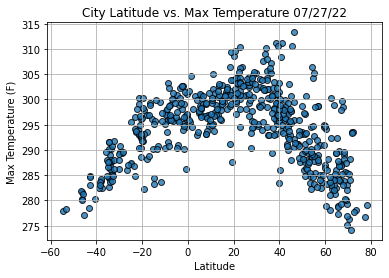

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

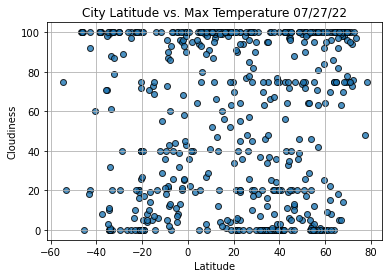

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

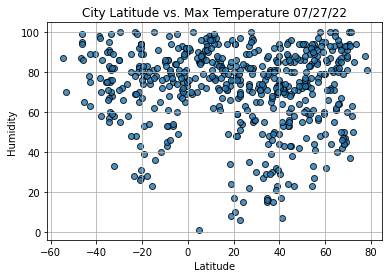

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


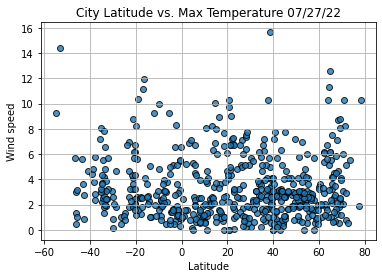

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2022-07-28 01:07:58
Lat                       59.7035
Lng                       30.7861
Max Temp                   287.09
Humidity                       95
Cloudiness                      0
Wind Speed                   2.01
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
553    False
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-28 01:09:28,42.6001,-73.9662,296.38,70,100,0.72
3,Bandar-E Lengeh,IR,2022-07-28 01:11:29,26.5579,54.8807,304.42,71,85,7.11
4,Yar-Sale,RU,2022-07-28 01:11:30,66.8333,70.8333,287.19,67,100,4.53
5,Severo-Kurilsk,RU,2022-07-28 01:11:30,50.6789,156.1250,286.10,86,95,3.04
6,Lagoa,PT,2022-07-28 01:11:31,39.0500,-27.9833,295.04,81,0,4.07


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [27]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-28 01:09:28,42.6001,-73.9662,296.38,70,100,0.72
3,Bandar-E Lengeh,IR,2022-07-28 01:11:29,26.5579,54.8807,304.42,71,85,7.11
4,Yar-Sale,RU,2022-07-28 01:11:30,66.8333,70.8333,287.19,67,100,4.53
5,Severo-Kurilsk,RU,2022-07-28 01:11:30,50.6789,156.1250,286.10,86,95,3.04
6,Lagoa,PT,2022-07-28 01:11:31,39.0500,-27.9833,295.04,81,0,4.07
...,...,...,...,...,...,...,...,...,...
552,Kangavar,IR,2022-07-28 01:28:33,34.5043,47.9653,294.62,16,34,0.27
554,Okhotsk,RU,2022-07-28 01:28:35,59.3833,143.3000,291.01,79,25,0.92
555,Tema,GH,2022-07-28 01:28:36,5.6670,-0.0166,298.38,88,75,5.14
556,Dzerzhinskoye,RU,2022-07-28 01:28:37,56.8344,95.2283,287.96,75,100,1.16


In [28]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Santa Isabel Do Rio Negro,BR,2022-07-28 01:11:28,-0.4139,-65.0192,296.72,90,100,0.87
2,Atuona,PF,2022-07-28 01:11:29,-9.8000,-139.0333,297.75,77,18,10.00
9,Saldanha,ZA,2022-07-28 01:08:18,-33.0117,17.9442,285.60,68,0,1.87
10,Mataura,NZ,2022-07-28 01:11:33,-46.1927,168.8643,281.75,99,100,1.35
14,Busselton,AU,2022-07-28 01:06:51,-33.6500,115.3333,287.70,70,61,4.86
...,...,...,...,...,...,...,...,...,...
533,Ambulu,ID,2022-07-28 01:27:19,-8.3450,113.6058,298.80,73,43,1.88
537,Tuatapere,NZ,2022-07-28 01:25:52,-46.1333,167.6833,280.03,94,100,0.46
544,Gizo,SB,2022-07-28 01:27:25,-8.1030,156.8419,302.18,68,2,3.60
550,Itarema,BR,2022-07-28 01:28:31,-2.9248,-39.9167,299.29,77,100,6.53


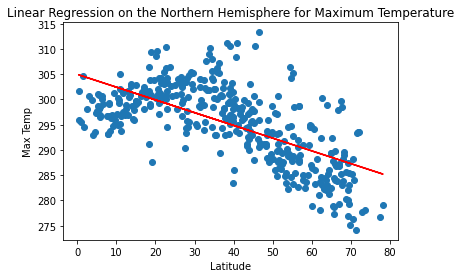

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(40,10))

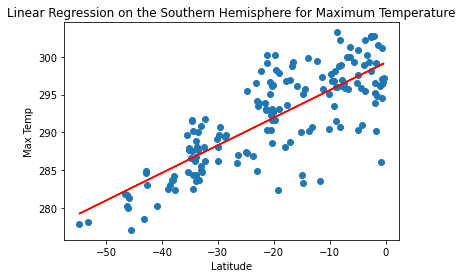

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(170,-160))

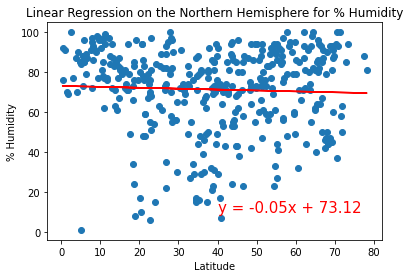

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

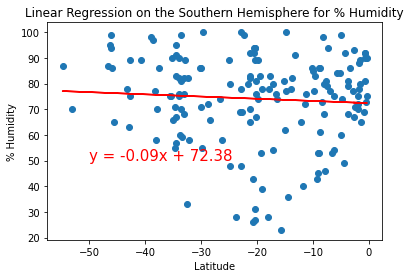

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,50))

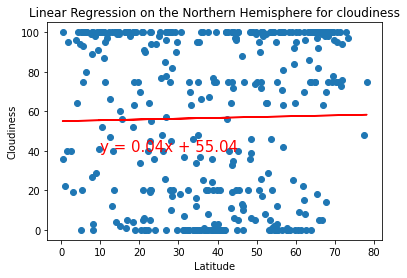

In [58]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for cloudiness', 'Cloudiness',(10,40))

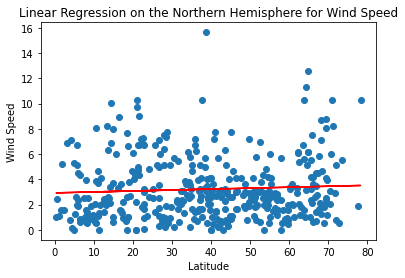

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(-10,90))

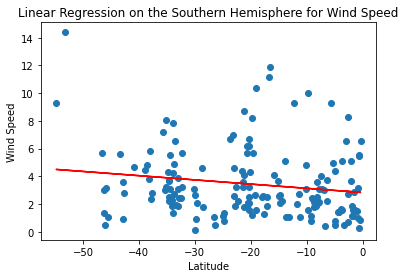

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))